# DICOM real data 이미지 변환

---

In [1]:
from glob import glob
import os
import numpy as np
import pydicom
#import skimage.external.tifffile 
import matplotlib.pyplot as plt
#import imsave
from PIL import Image

---
## dicom 추출 변환 과정 

In [72]:
########################################################################################
# 사진 경로 설정
dicom_dir_train = 'C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\task3_dcm\\real_data\\dicom_file\\TRAINING_SET'
dicom_dir_test = 'C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\task3_dcm\\real_data\\dicom_file\\TEST_SET'
# dcm 파일 all reading 
dcm_files_train = glob(os.path.join(dicom_dir_train, '*.dcm'))
dcm_files_test = glob(os.path.join(dicom_dir_test, '*.dcm'))


####################################################################################
# 훈련 셋 1~ 348, 테스트 셋 1~ 136
# 각 dicom 파일해당하는 넘버 생성
n = 348+1
num_train = [str(list(range(1,n))[i]) for i in range(0,n-1)]
num_train_index = ['\\'+num_train[i] for i in range(len(num_train))]

n1 = 136+1
num_test = [str(list(range(1,n1))[i]) for i in range(0,n1-1)]
num_test_index = ['\\'+num_train[i] for i in range(len(num_test))]

# 0 train,. 1 test
num_list = [num_train_index, num_test_index ]

######################################################################################
# dcm 파일 주소와 인덱스 결합 리스트 생성

dicom_train_index = []

for i in range(len(num_list[0])):
    a__ = dicom_dir_train + num_list[0][i]
    dicom_train_index.append(a__)
    
dicom_test_index = []

for i in range(len(num_list[1])):
    a___ = dicom_dir_test + num_list[1][i]
    dicom_test_index.append(a___)
###############################################################################################    
# 최종 dicom 파일 주소 

final_train_index = [glob(os.path.join(dicom_train_index[i], '*.dcm')) for i in range(len(dicom_train_index))]
final_test_index = [glob(os.path.join(dicom_test_index[i], '*.dcm')) for i in range(len(dicom_test_index))]

---
## dicom 파일 -> 변환 및 추출

- train, test input data에 대해 파일을 변환하고 추출함

In [73]:

# Windowing 함수
def apply_windowing(image, window_center, window_width):
    """
    Windowing을 적용하여 픽셀 값을 조정합니다.
    """
    image = image.astype(np.float32)
    lower_bound = window_center - window_width / 2
    upper_bound = window_center + window_width / 2
    
    image = (image - lower_bound) / (upper_bound - lower_bound) * 255
    image = np.clip(image, 0, 255)
    
    return image.astype(np.uint8)

# 각 DICOM 파일에 대해 반복
for num in range(len(final_train_index)):
    for i, file_path in enumerate(final_train_index[num]):
        # DICOM 파일 읽기
        ds = pydicom.dcmread(file_path)

        # DICOM 이미지 가져오기
        image = ds.pixel_array

        if hasattr(ds, 'WindowCenter') and hasattr(ds, 'WindowWidth'):
            # Windowing을 적용
            window_center = ds.WindowCenter if isinstance(ds.WindowCenter, float) else ds.WindowCenter[0]
            window_width = ds.WindowWidth if isinstance(ds.WindowWidth, float) else ds.WindowWidth[0]
            image = apply_windowing(image, window_center, window_width)

        pil_image = Image.fromarray(image)

        # 이미지 저장 (파일 경로 지정)
        output_file_path = f'X_train/output_image_{num}_{i}.png'  # png or tif
        pil_image.save(output_file_path)

        print(f"이미지가 저장되었습니다: {output_file_path}")

for num in range(len(final_test_index)):
    for i, file_path in enumerate(final_test_index[num]):
        # DICOM 파일 읽기
        ds = pydicom.dcmread(file_path)

        # DICOM 이미지 가져오기
        image = ds.pixel_array

        if hasattr(ds, 'WindowCenter') and hasattr(ds, 'WindowWidth'):
            # Windowing을 적용
            window_center = ds.WindowCenter if isinstance(ds.WindowCenter, float) else ds.WindowCenter[0]
            window_width = ds.WindowWidth if isinstance(ds.WindowWidth, float) else ds.WindowWidth[0]
            image = apply_windowing(image, window_center, window_width)

        pil_image = Image.fromarray(image)

        # 이미지 저장 (파일 경로 지정)
        output_file_path = f'X_test/output_image_{num}_{i}.png'  # png or tif
        pil_image.save(output_file_path)

        print(f"이미지가 저장되었습니다: {output_file_path}")        

이미지가 저장되었습니다: X_train/output_image_0_0.png
이미지가 저장되었습니다: X_train/output_image_0_1.png
이미지가 저장되었습니다: X_train/output_image_0_2.png
이미지가 저장되었습니다: X_train/output_image_0_3.png
이미지가 저장되었습니다: X_train/output_image_0_4.png
이미지가 저장되었습니다: X_train/output_image_0_5.png
이미지가 저장되었습니다: X_train/output_image_1_0.png
이미지가 저장되었습니다: X_train/output_image_1_1.png
이미지가 저장되었습니다: X_train/output_image_1_2.png
이미지가 저장되었습니다: X_train/output_image_1_3.png
이미지가 저장되었습니다: X_train/output_image_1_4.png
이미지가 저장되었습니다: X_train/output_image_1_5.png
이미지가 저장되었습니다: X_train/output_image_2_0.png
이미지가 저장되었습니다: X_train/output_image_2_1.png
이미지가 저장되었습니다: X_train/output_image_2_2.png
이미지가 저장되었습니다: X_train/output_image_2_3.png
이미지가 저장되었습니다: X_train/output_image_2_4.png
이미지가 저장되었습니다: X_train/output_image_2_5.png
이미지가 저장되었습니다: X_train/output_image_3_0.png
이미지가 저장되었습니다: X_train/output_image_3_1.png
이미지가 저장되었습니다: X_train/output_image_3_2.png
이미지가 저장되었습니다: X_train/output_image_3_3.png
이미지가 저장되었습니다: X_train/output_image_3_4.png
이미지가 저장되었습니

---

In [27]:
# dcm list
dcm_lst = [pydicom.dcmread(dcm_files[i]) for i in range(len(dcm_files ))]

In [28]:
# img list
img_lst = [dcm_lst[i].pixel_array for i in range(len(dcm_lst))]

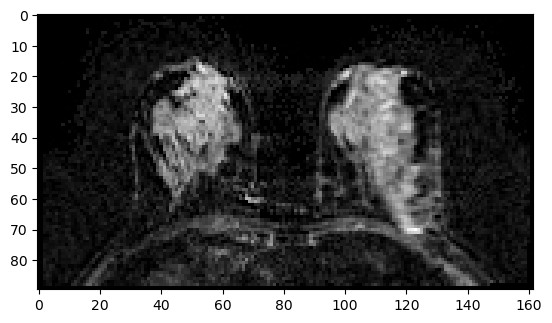

In [29]:
plt.imshow(img_lst[0], cmap = 'gray')